ابتدا باید کتاب خانه 

nashpy  

را نصب کنیم

In [1]:
!pip install nashpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


با  چند دستور ابتدایی این کتابخانه شروع میکنیم و آنها را توضیح میدهیم ...

در این قسمت هر دو جدول بازیکن سطر وستون با یکدیگر برابر هستند

In [2]:
import nashpy as nash
import numpy as np
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
rps = nash.Game(A)
print(rps)

Zero sum game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]


اگر ماتریس های دو بازیکن با یکدیگر برابر نباشند به صورت زیر میتوانیم انجام دهیم

In [3]:
B =np.array([[1, 0, 1], [1, 1, -1], [-1, 1, -1]])
rps = nash.Game(A, B)
print(rps)

Bi matrix game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 1  0  1]
 [ 1  1 -1]
 [-1  1 -1]]


برای به دست آوردن یوتیلیتی یک استراتژی از جدول به صورت زیر انجام میدهیم

In [4]:
sigma_r = [0, 0, 1]
sigma_c = [0, 1, 0]
print(rps[sigma_r, sigma_c])

[1 1]


حال میخواهیم با استفاده از این کتابخانه نقطه(نقاط) تعادل نش بازی سنگ کاغذ قیجی را که در قسمت اول دیدید را پیدا کنیم.
یک بار با استفاده از
game.support_enumeration 
و بارهای دیگر با استفاده از 
game.vertex_enumeration , Lemke Howson
کد را پیاده سازی کنید. 
و در پایان با جستجو در اینترنت بگویید که تفاوت عملکرد این سه در جیست و خروجی هر سه را با هم مقایسه کنید.
آیا خروجی یا pure strategy است یا mixed strategy?

In [5]:
eqs = rps.support_enumeration()
list(eqs)

/usr/local/lib/python3.10/dist-packages/nashpy/algorithms/support_enumeration.py:259: RuntimeWarning: 
An even number of (4) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


[(array([1., 0., 0.]), array([0., 0., 1.])),
 (array([0., 1., 0.]), array([1., 0., 0.])),
 (array([0., 0., 1.]), array([0., 1., 0.])),
 (array([0.66666667, 0.        , 0.33333333]),
  array([0.        , 0.33333333, 0.66666667]))]

همانطور که میبینیم آخرین دو آرایه آخر ایندکس های غیر صحیح دارند که این دو عبارتند از نقاط تعادل میکس شده .
که همان عبارت احتمالی برای انتخاب استراتژی مورد قبول یک فرد را میدهند.

برای چک کردن این که یک استراتژی بهترین جواب است  از کد زیر استفاده میکنیم.

In [6]:
sigma_r = np.array([0, 1, 0])
sigma_c = np.array([1, 0, 0])
print(rps.is_best_response(sigma_r, sigma_c))

(True, True)



ابتدا درباره مساله matching pennies تحقیق کنید.
اگر بخواهیم چند بار انتخاب استراتژی انجام بگیرد، کدی بنویسید که تکرار عملیات صورت بگیرد
تعداد تکرار را برابر 2 رد نظر بگیرید. 
ماتریس بازی را نمایش دهید.

In [4]:
import nashpy.repeated_games
A = np.array([[1, -1], [-1, 1]])
matching_pennies = nash.Game(A)


حال اگر بخواهیم تعداد تکرار ها را بیشتر کنیم چه؟
برای تکرار های بیشتر این روش محاسبات زیادی میخواهد بجایش از روش های لرنینگ استفاده میکنیم.


در زیر الگوریتم فیکتس
game.fictitious_play
یکی از روش های لرن کردن میباشد.
البته همیشه این الگوریتم همگرا نمیشود 

In [8]:
A = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
B = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])
game = nash.Game(A, B)
iterations = 10000
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]

[array([5464., 1436., 3100.]), array([2111., 4550., 3339.])]

در مساله فوق اعداد آرایه
play_counts 
باید بر تعداد iteration 
تقسیم کنید تا احتمال هر استراتژی بدست بیاید و خروجی را نشان دهید.
و در نهایت احتمال هر استراتژی را برای بازیکن اول
row player
را نسبت به  
پلات کنید.iterations
آیا الگوریتمها همگرا میشوند؟ توضیح دهید...
 
 
 
شما صرفا باید به روش گفته شده ptobabilities 
را بصورت مناسب تعریف کنید ...

<ipython-input-9-e9a0b05537c2>:3: RuntimeWarning: invalid value encountered in true_divide
  probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


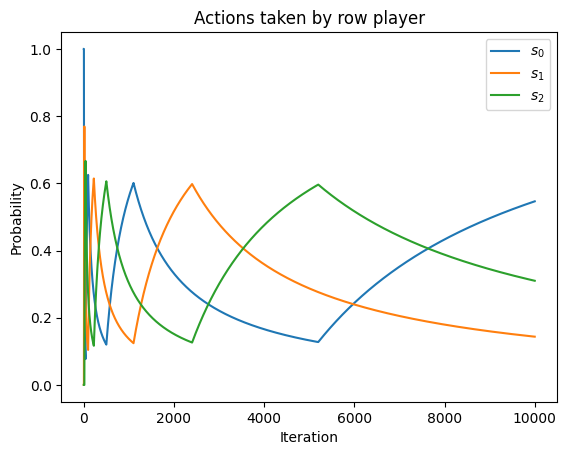

In [9]:
import matplotlib.pyplot as plt
plt.figure() 

probabilities = 

for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")  

    
    
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend() 

این بار برای ماتریس هایA , B
همان الگوریتم قبلی را تکرار کنید و نشان دهید که این بار برای بازیکن دوم الگوریتم ها همگرا میشوند

In [3]:
A = np.array([[1 / 2, 1, 0], [0, 1 / 2, 1], [1, 0, 1 / 2]])
B = np.array([[1 / 2, 0, 1], [1, 1 / 2, 0], [0, 1, 1 / 2]])
game = nash.Game(A, B)
np.random.seed(0)


حال میخواهیم ببینیم یک بازیکن در گذر زمان چه احتمالی از استراتژی ها را بازی میکند.
 با استفاده از الگوریتم 
replicator dynamics
برای ماتریس های  هزینه َA,
این کار را انجام دهید.
( البته پیش از این کار همانند قسمت قبل 
احتمال هر استراتژی را برای بازیکن اول و دوم پلات بگیرید)

In [2]:
import nashpy as nash
import numpy as np
A = np.array([[3, 2], [4, 2]])
B = np.array([[1, 3], [2, 4]])
game = nash.Game(A,B)